<a href="https://www.kaggle.com/code/lalit7881/global-ecommerce-leaders-eda-57-14?scriptVersionId=293681104" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-ecommerce-leaders-founding-snapshot/top_ecommerce_brands.csv


## Title:
“Global eCommerce Leaders”

## Detailed Description:
This snapshot presents a concise yet powerful overview of the world’s most influential eCommerce companies, highlighting their founding vision, entrepreneurial origins, and global impact. It captures how visionary founders transformed simple digital ideas into scalable platforms that reshaped global trade, consumer behavior, logistics, and digital payments. The focus is on innovation-driven growth, platform ecosystems, technology adoption, and market expansion strategies that enabled these companies to dominate international markets. Together, these leaders represent the foundation of the modern digital economy and the evolution of commerce from local marketplaces to borderless global platforms.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/global-ecommerce-leaders-founding-snapshot/top_ecommerce_brands.csv")

In [3]:
df.head()

,brand_name,founded_year,founder,country
0,Amazon,1994,Jeff Bezos,USA
1,Alibaba,1999,Jack Ma,China
2,Shopify,2006,Tobias Lütke,Canada
3,PDD Holdings,2015,Colin Huang,China
4,MercadoLibre,1999,Marcos Galperin,Argentina


In [4]:
df.tail()

,brand_name,founded_year,founder,country
61,Americanas,1929,Max Landesmann,Brazil
62,Baozun,2007,Vincent Wenbin Qiu,China
63,The Original BARK Company,2011,"Matt Meeker, Henrik Werdelin, Carly Strife",USA
64,Webuy Global,2018,"Bin Xue, Gin Loo, Ilay Yulish",Singapore
65,Jeffs' Brands,2021,Viki Hakmon,Israel


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand_name    66 non-null     object
 1   founded_year  66 non-null     int64 
 2   founder       66 non-null     object
 3   country       66 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.2+ KB


In [6]:
df.describe()

,founded_year
count,66.000000
mean,2003.590909
std,12.995830
min,1929.000000
25%,1999.000000
50%,2006.000000
75%,2011.000000
max,2021.000000


In [7]:
df.isnull().sum()

brand_name      0
founded_year    0
founder         0
country         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(66, 4)

In [10]:
df.dtypes

brand_name      object
founded_year     int64
founder         object
country         object
dtype: object

In [11]:
df.columns

Index(['brand_name', 'founded_year', 'founder', 'country'], dtype='object')

## Data visualizations

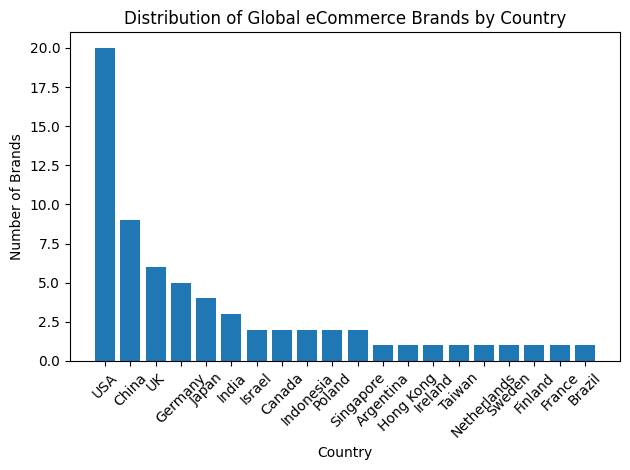

In [12]:
country_counts = df['country'].value_counts()

plt.figure()
plt.bar(country_counts.index, country_counts.values)
plt.xlabel("Country")
plt.ylabel("Number of Brands")
plt.title("Distribution of Global eCommerce Brands by Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


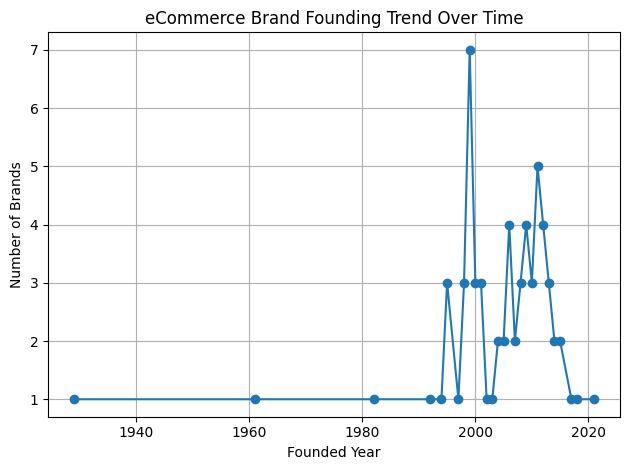

In [13]:
year_counts = df['founded_year'].value_counts().sort_index()

plt.figure()
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel("Founded Year")
plt.ylabel("Number of Brands")
plt.title("eCommerce Brand Founding Trend Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


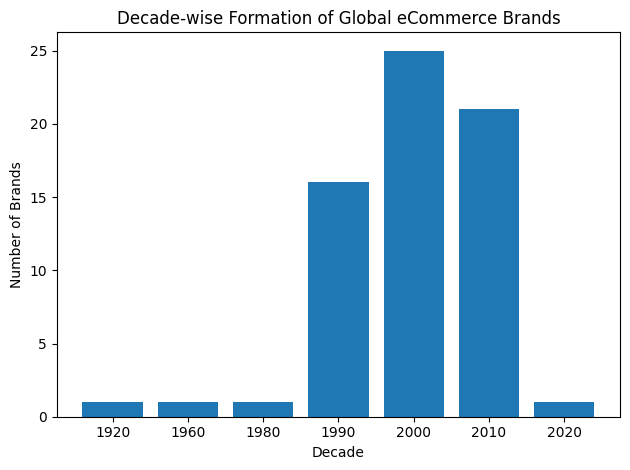

In [14]:
df['decade'] = (df['founded_year'] // 10) * 10
decade_counts = df['decade'].value_counts().sort_index()

plt.figure()
plt.bar(decade_counts.index.astype(str), decade_counts.values)
plt.xlabel("Decade")
plt.ylabel("Number of Brands")
plt.title("Decade-wise Formation of Global eCommerce Brands")
plt.tight_layout()
plt.show()


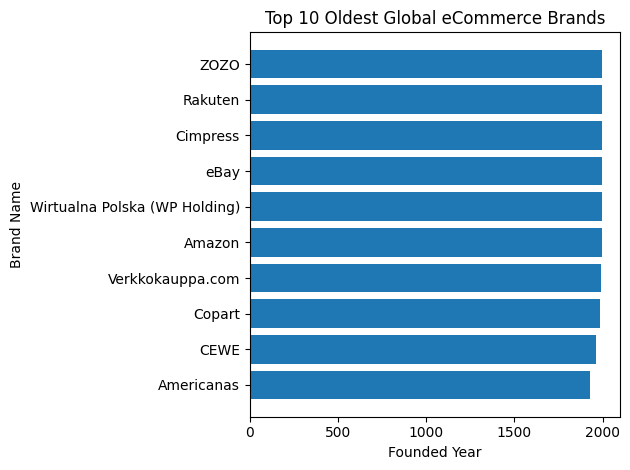

In [15]:
oldest_brands = df.sort_values('founded_year').head(10)

plt.figure()
plt.barh(oldest_brands['brand_name'], oldest_brands['founded_year'])
plt.xlabel("Founded Year")
plt.ylabel("Brand Name")
plt.title("Top 10 Oldest Global eCommerce Brands")
plt.tight_layout()
plt.show()


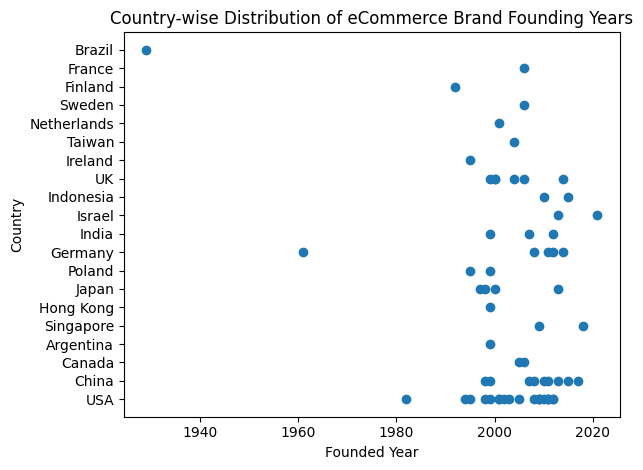

In [16]:
plt.figure()
plt.scatter(df['founded_year'], df['country'])
plt.xlabel("Founded Year")
plt.ylabel("Country")
plt.title("Country-wise Distribution of eCommerce Brand Founding Years")
plt.tight_layout()
plt.show()


In [17]:
print("Total Brands:", df.shape[0])
print("Countries Covered:", df['country'].nunique())
print("Earliest Founded Year:", df['founded_year'].min())
print("Latest Founded Year:", df['founded_year'].max())


Total Brands: 66
Countries Covered: 20
Earliest Founded Year: 1929
Latest Founded Year: 2021


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [19]:
le_brand = LabelEncoder()
le_founder = LabelEncoder()
le_country = LabelEncoder()

df['brand_name'] = le_brand.fit_transform(df['brand_name'])
df['founder'] = le_founder.fit_transform(df['founder'])
df['country'] = le_country.fit_transform(df['country'])


In [20]:
X = df[['brand_name', 'founded_year', 'founder']]
y = df['country']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [22]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


In [23]:
accuracy_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_results[model_name] = accuracy


In [24]:
accuracy_df = pd.DataFrame({
    "Model": accuracy_results.keys(),
    "Accuracy (%)": accuracy_results.values()
}).sort_values(by="Accuracy (%)", ascending=False)

print(accuracy_df)


                    Model  Accuracy (%)
3  Support Vector Machine     57.142857
0     Logistic Regression     28.571429
4     K-Nearest Neighbors     21.428571
2           Random Forest     21.428571
5             Naive Bayes     21.428571
1           Decision Tree     14.285714


In [25]:
best_model = accuracy_df.iloc[0]
print("Best Performing Model:")
print(best_model)


Best Performing Model:
Model           Support Vector Machine
Accuracy (%)                 57.142857
Name: 3, dtype: object


## Thank you..pls upvote!!!!